In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size =32

print('Loading data .....')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

print('Input train shape', input_train.shape)
print('Input test shape', input_test.shape)

Using TensorFlow backend.
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Pas

Loading data .....
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
Input train shape (25000, 500)
Input test shape (25000, 500)


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Python\anacoda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.5352 - acc: 0.7488 - val_loss: 0.3689 - val_acc: 0.8502
Epoch 2/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.3088 - acc: 0.8774 - val_loss: 0.3823 - val_acc: 0.8354
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2380 - acc: 0.9102 - val_loss: 0.3516 - val_acc: 0.8516
Epoch 4/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2069 - acc: 0.9242 - val_loss: 0.3422 - val_acc: 0.8648
Epoch 5/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1801 - acc: 0.9348 - val_loss: 0.4516 - val_acc: 0.8238
Epoch 6/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1701 - acc: 0.9401 - val_loss: 0.3491 - val_acc: 0.8702
Epoch 7/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1482 - acc: 0.9472 - val_loss: 0.3058 - val_acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


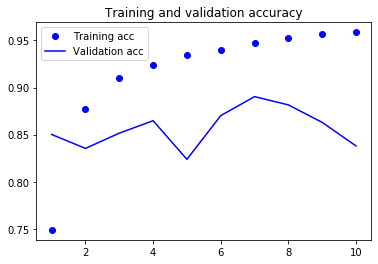

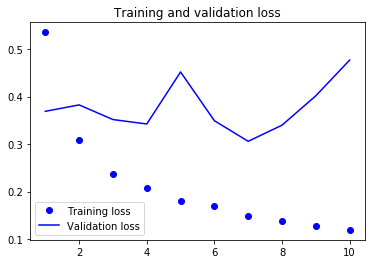

In [3]:
import matplotlib.pyplot as plt

print(history.history.keys())

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()